# Using predictive Analysis to diagnose Breast tumor
  By Mohammed Toffick
  
## 1- Problem Identification
Breast cancer can occur in women and rarely in men.
Symptoms of breast cancer include a lump in the breast, bloody discharge from the nipple and changes in the shape or texture of the nipple or breast.Treatment depends on the stage of cancer. It may consist of chemotherapy, radiation and surgery.
### 1.1 Expected outcome
The expected outcome of this analysis is predict if the state of the breast tumor is malignant (Cancerous) or Beningn (non-Cancerous). The target for the model is categorical.
1- Malignant
0- Benign
### 1.2 Objective 
Main objective is to predict if the tumor is in the malignant or benign stage. This problem therefore can be solved with classification algorithmn. 
### 1.3 Datasource
Data was obtained from kaggle.com 

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

These libraries will help in manipulation and importing of the dataset and helps with exploratory data analysis


### Loading the dataset 
The data is loaded as a csv file with the help of pandas read_csv

### Inspecting the data

1-You check the first few rows of the dataset - you have a feel of the dataset

2-Checking the shape of the dataset - help us know the total rows and columns

3-The description of the dataset - summarizes the statistics of the dataset, by showig the count, mean, max etc

In [2]:
df=pd.read_csv("C:\\Users\\Person\\Documents\\GitHub\\Breast-tumor-predictive-analysis\\data\\Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.shape

(569, 6)

In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# 2- Data Cleaning and wrangling
Helps to fix all issues that might affect the performance of our model.
### Null values detection 


In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

### Outiers Detection
With the helps of the boxplot visualization method we find the particular column with outliers. 
An outlier is a value or object that deviates significatly from the whole dataset.

So the column bars with the sprouting bubbles, then informs us of outlier availability in that column

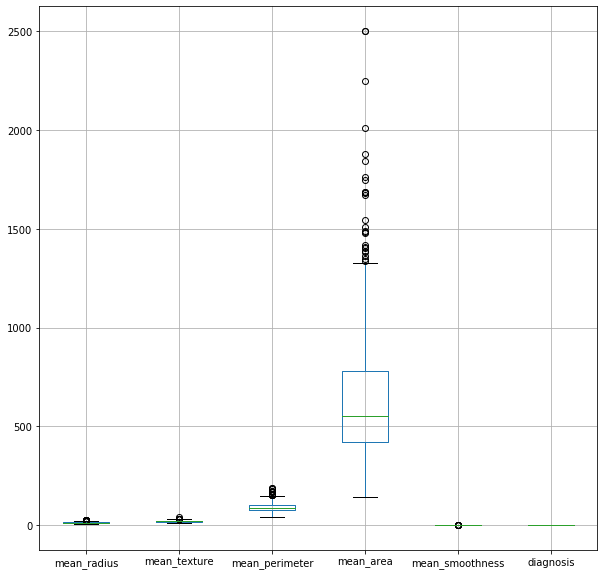

In [6]:
df.boxplot(figsize=(10,10))

According to the analysis above the mean_area column has a number of outliers
which needs to be cleared and skewness corrected

### Outlier detection, removal or correcting

In [7]:
#Mean_area
df['mean_area'].skew()

1.6457321756240424

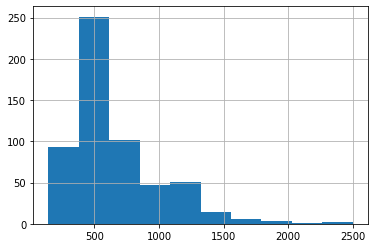

In [8]:
df['mean_area'].hist()

Using log transformation to correct how skewed to the left the histogram is

In [9]:
df['mean_area']=np.log(df['mean_area'])
print(df['mean_area'].skew())

0.2849574596767259


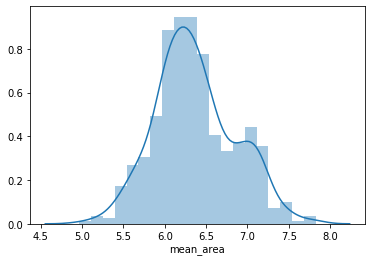

In [10]:
sns.distplot(df['mean_area'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4e34c2f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4e34c7fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4e34c2748>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4e34c9f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4e34c9fc8>],
 'means': []}

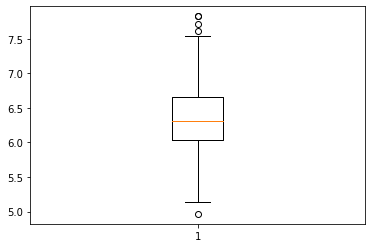

In [11]:
plt.boxplot(df['mean_area'])

from the boxplot above it clearly shows that most of the outliers have been 
cleared

#### #Changing the diagnosis column to have 1 - Malignant 0 - Benign 
This will help in the description of the cancer well

In [12]:
breast_cancer={1:'Malignant',0:'Benign'}
df['diagnosis']=df['diagnosis'].map(breast_cancer)

In [13]:
df['diagnosis'].head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: diagnosis, dtype: object

# 3- Feature Engineering 
What we are doing at this stage is simply, creating new features from the existing ones.
This step will help in better model performance. Commonly doe with addition,substraction etc.

Creating smoothness per area ratio

In [14]:
df['area_smoothness_ratio']=df['mean_area']/df.mean_smoothness
df['area_smoothness_ratio'].head()

0    58.350969
1    84.846851
2    64.713264
3    41.797168
4    71.463701
Name: area_smoothness_ratio, dtype: float64

In [15]:
df['perimeter_texture_ratio']=df['mean_perimeter']/df.mean_area
df['perimeter_texture_ratio'].head()

0    17.774549
1    18.484206
2    18.329031
3    13.025310
4    18.848158
Name: perimeter_texture_ratio, dtype: float64

In [16]:
df['mean_texture_radius_ratio']=df.mean_radius/df.mean_texture
df['mean_texture_radius_ratio'].head()

0    1.733141
1    1.157569
2    0.926588
3    0.560353
4    1.414923
Name: mean_texture_radius_ratio, dtype: float64

In [17]:
df['mean_radius_perimeter_ratio']=df.mean_radius/df.mean_perimeter
df['mean_radius_perimeter_ratio'].head()

0    0.146498
1    0.154778
2    0.151462
3    0.147203
4    0.150185
Name: mean_radius_perimeter_ratio, dtype: float64

In [18]:
df['mean_radius_area_ratio']=df.mean_radius/df.mean_area
df['mean_radius_perimeter_ratio'].head()

0    0.146498
1    0.154778
2    0.151462
3    0.147203
4    0.150185
Name: mean_radius_perimeter_ratio, dtype: float64

In [19]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,area_smoothness_ratio,perimeter_texture_ratio,mean_texture_radius_ratio,mean_radius_perimeter_ratio,mean_radius_area_ratio
0,17.99,10.38,122.80,6.908755,0.11840,Benign,58.350969,17.774549,1.733141,0.146498,2.603942
1,20.57,17.77,132.90,7.189922,0.08474,Benign,84.846851,18.484206,1.157569,0.154778,2.860949
2,19.69,21.25,130.00,7.092574,0.10960,Benign,64.713264,18.329031,0.926588,0.151462,2.776143
3,11.42,20.38,77.58,5.956096,0.14250,Benign,41.797168,13.025310,0.560353,0.147203,1.917363
4,20.29,14.34,135.10,7.167809,0.10030,Benign,71.463701,18.848158,1.414923,0.150185,2.830712


Finding the correlation of the numerical columns

### Insight Drawn:

##### Features  that are highly correlated with each other proves that they do the same thing hence one of them is redundant.
##### Later on in the analysis we will implement Recursive feature elimination  do deal with that statistical problem

## 4- Exploratory Data Analysis
We will visualize (with the help of bars,scatter etc), and inteprate the hidden information behind the rows and columns.
This step is very important step, and usually done after feature engineering and acquiring the data. Must be done any ML modelling.***EDA*** will help data scientists, to understand the data and not make assumptions.

>There are two approaches used to examine the data at hand:

>*Descriptive analysis-simply helps in finding the characteristics of numeric features of the datset.Typical examples are mean,mode,standard deviation.

>2-Visualizing - simply helps in projected the data into abstract images. These projected images help in drawing insights,preprocessing and modelling. Goes a long way in simplifying most of the steps in the analysis.

## Descriptive Statisics
> Statistical measurement summary to describe the data.In the field of descriptive statistics there are many summary measurements.

### Baisc Descriptive statistics

In [20]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,area_smoothness_ratio,perimeter_texture_ratio,mean_texture_radius_ratio,mean_radius_perimeter_ratio,mean_radius_area_ratio
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,6.363185,0.096360,67.324998,14.258217,0.755014,0.154148,2.192359
std,3.524049,4.301036,24.298981,0.483139,0.014064,10.204782,2.617447,0.201563,0.003067,0.370687
min,6.981000,9.710000,43.790000,4.966335,0.052630,33.759164,8.817367,0.302319,0.140431,1.405664
25%,11.700000,16.170000,75.170000,6.040969,0.086370,59.721796,12.443684,0.617377,0.152385,1.937999
50%,13.370000,18.840000,86.240000,6.311916,0.095870,67.112906,13.692412,0.730360,0.154586,2.116758
75%,15.780000,21.800000,104.100000,6.662749,0.105300,73.863901,15.684856,0.873971,0.156447,2.377450
max,28.110000,39.280000,188.500000,7.824446,0.163400,100.324130,24.093626,1.733141,0.161937,3.592954


In [21]:
df.diagnosis.value_counts()

Malignant    357
Benign       212
Name: diagnosis, dtype: int64

In [22]:
df.skew()

mean_radius                    0.942380
mean_texture                   0.650450
mean_perimeter                 0.990650
mean_area                      0.284957
mean_smoothness                0.456324
area_smoothness_ratio          0.201848
perimeter_texture_ratio        0.889737
mean_texture_radius_ratio      0.748727
mean_radius_perimeter_ratio   -0.816824
mean_radius_area_ratio         0.842981
dtype: float64

In [23]:
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
Benign,212
Malignant,357


## Unimodal Data Visualization
The main reason for the visualization is to observe which features are helpful in the predictive analysis.
We will apply two techniques to understand the data;
* Histograms
* Density Plots

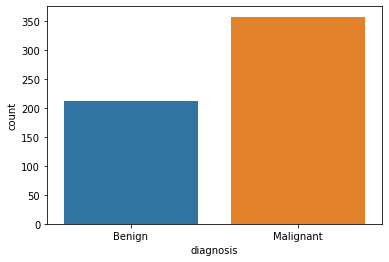

In [24]:
import seaborn as sns
sns.countplot(x="diagnosis" ,data=df)

#### This plot is showing the distribution of Benign (Non-cancerous) and Malignant(Cancerous) breast conditions.

### Visualize distribution of data via histogram
Histograms are mostly used to visualize numerical features.
Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

In [ ]:
df.hist(bins=10, figsize=(15, 15),grid=False,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4E39C4488>,
      dtype=object)

***Insights drawn:***
   >- Most of the plots are seen to have gaussian or almost gaussian distribution.
   >- Mean_radius_area and mean_perimeter as seen to have almost exponential distribution().

In [ ]:
df.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,15))

## 5- Data Preprocessing
This is an essential step for any data analysis problem.It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Normalizing the features (so that features on small scales do not dominate when fitting the model to data)

#### Main Goal:
Find the most predictive features of the data and filter it so it will enhance the accuracy of the ML analytics model. 

>- ####  Label Encoding

***Here, I assign the features to a NumPy array X,and transform the class labels from their original string 
representation (Malignant and Benign) into integers.***

In [ ]:
X=df.drop(['diagnosis'],axis=1)
Y=df.diagnosis

***Transform the class labels from their original string representation (Malignant and Benign) into integers***

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
Y = encode.fit_transform(Y)

***After encoding the target labels(diagnosis) in an array Y, the malignant tumors are now represented as class 1
(cancerous) and the benign tumors are represented as class 0 (non-cancerous), respectively, done by calling the 
transform method of LabelEncorder on two dummy variables.***

#### Feature Standardization

>-Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler((-1,1))

In [ ]:
features=scaler.fit_transform(X)

In [ ]:
target=Y

# 6- Feature Selection with Recursive Feature Elimination
***From our EDA and analysis above we found out that some of the features are just duplicates(hence redundant).This step helps to select features that will make our analysis better and improve performance of the model.***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 5)
fitted = rfe.fit(features,target)

In [ ]:
print("Num Features:", fitted.n_features_)
print("Selected Features:", fitted.support_)
print("Feature Ranking:", fitted.ranking_)

> Insights drawn:

It shows us that features like ***mean_radius,area_smoothness_ratio,mean_texture_radius_ratio,mean_radius_perimeter_ratio,   
    mean_radius_area_ratio*** are redundant and hence must be dropped for analysis to take place.

## 7- Model Building using the Support Vector machine (SVM)
SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995).
Reasons why the algorithm is being used for the analysis:
>- The data is structured 
>- The data has labels , hence it will need a supervised learning algorithm to build the predictive model.
>- The problem at hand is classification based.

***Important Parameters:***
The important parameters in kernel SVMs are the
* Regularization parameter C, 
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters. 

***Gamma and C*** both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report   
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=101)

***80% of the dataset is being used for training the model. This will help to get a more sophisticated model.
20% of the dataset will be used for testing and that helps us evaluate the performance of the model.***

In [ ]:
model=svm.SVC(gamma=0.001,C=100)
fittedModel=model.fit(features_train,target_train)
predictions=fittedModel.predict(features_test)

In [ ]:
conf_m=confusion_matrix(target_test,predictions)
conf_m

In [ ]:
plt.imshow(conf_m)

In [ ]:
accuracy_score(target_test,predictions)*100

***The SVM model performed at 90.35 % accuracy. The model can do much better if the Regularizer C and gamma are fine tuned.***


In [ ]:
print("\n")
print(classification_report(target_test,predictions))

## 8-Validating the model with k-folds
***Using cross validation helps to ward off any instance of overfitting and underfitting in the model being built.***

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,features,target, cv=30)

### Model Deployment as an API